### 梯度下降法算法详情参考：https://www.cnblogs.com/pinard/p/5970503.html

### 随机梯度下降(SGD) 是一种简单但又非常高效的方法，主要用于凸损失函数下线性分类器的判别式学习，例如(线性) 支持向量机 和 Logistic 回归 。



### Stochastic Gradient Descent （随机梯度下降法）的优势:

+ 高效。
+ 易于实现 (有大量优化代码的机会)。

### Stochastic Gradient Descent （随机梯度下降法）的劣势:

+ SGD 需要一些超参数，例如 regularization （正则化）参数和 number of iterations （迭代次数）。
+ SGD 对 feature scaling （特征缩放）敏感。

---
# 随机梯度下降分类

### loss function（损失函数） 可以通过 loss 参数来设置。 SGDClassifier 支持以下的 loss functions（损失函数）：

+ loss=”hinge”: (soft-margin) linear Support Vector Machine （（软-间隔）线性支持向量机），
+ loss=”modified_huber”: smoothed hinge loss （平滑的 hinge 损失），
+ loss=”log”: logistic regression （logistic 回归），
+ and all regression losses below（以及所有的回归损失）。

### 惩罚方法可以通过 penalty 参数来设定。 SGD 支持以下 penalties（惩罚）:

+ penalty=”l2”: L2 norm penalty on coef_.
+ penalty=”l1”: L1 norm penalty on coef_.
+ penalty=”elasticnet”: Convex combination of L2 and L1（L2 型和 L1 型的凸组合）; (1 - l1_ratio) * L2 + l1_ratio * L1.

### 默认设置为 penalty=”l2” 。 L1 penalty （惩罚）导致稀疏解，使得大多数系数为零。 Elastic Net（弹性网）解决了在特征高相关时 L1 penalty（惩罚）的一些不足。参数 l1_ratio 控制了 L1 和 L2 penalty（惩罚）的 convex combination （凸组合）。

回归系数： [[ 0.18383083 -1.56522671]]
偏差： [3.74494789]


/home/sizheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


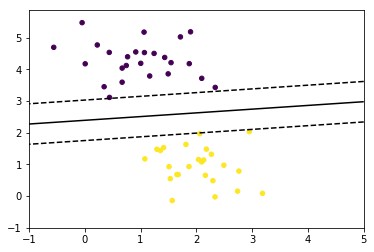

In [2]:
#===============随机梯度下降法分类===============  

from sklearn.linear_model import SGDClassifier  
from sklearn.datasets.samples_generator import make_blobs  
import numpy as np  
import matplotlib.pyplot as plt  

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)  
# loss：损失项。hinge：（软-间隔）线性支持向量机，modified_huber：平滑的 hinge 损失，log：logistic 回归，其他所有的回归损失  
# penalty：惩罚项。l2：L2正则，l1：L1正则，elasticnet：(1 - l1_ratio) * L2 + l1_ratio * L1  
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200, fit_intercept=True)  #  
clf.fit(X, y)  # 训练模型  

print('回归系数：',clf.coef_)  
print('偏差：',clf.intercept_ )  

# 绘制线，点  
xx1 = np.linspace(-1, 5, 10)  
xx2 = np.linspace(-1, 5, 10)  

X1, X2 = np.meshgrid(xx1, xx2)  # X1、X2都是10*10的矩阵  
Z = np.empty(X1.shape)  
for (i, j), val in np.ndenumerate(X1):  # 迭代第i行第j列的坐标xx1取值为val  
    x1 = val  
    x2 = X2[i, j]  #  
    p = clf.decision_function([[x1, x2]])  # 计算输出值，也就是到超平面的符号距离。（支持向量到最佳超平面的符号距离为-1和+1）  
    Z[i, j] = p[0]  
levels = [-1.0, 0.0, 1.0]  # 将输出值分为-1,0,1几个区间  
linestyles = ['dashed', 'solid', 'dashed']  
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)  # 绘制等高线图，高度为-1,0,1，也就是支持向量形成的线和最佳分割超平面  
plt.scatter(X[:, 0], X[:, 1], c=y, s=20)  # 绘制样本点  
plt.show()  

---
# 随机梯度下降法进行多分类

SGDClassifier 通过利用 “one versus all” （OVA）方法来组合多个二分类器，从而实现多分类。对于每一个 K 类, 可以训练一个二分类器来区分自身和其他 K-1 个类。

在 multi-class classification （多类分类）的情况下， coef_ 是 shape=[n_classes, n_features] 的一个二维数组， intercept_ 是 shape=[n_classes] 的一个一维数组。 coef_ 的第 i 行保存了第 i 类的 OVA 分类器的权重向量；类以升序索引 （参照属性 classes_ ）。 注意，原则上，由于它们允许创建一个概率模型，所以 loss=”log” 和 loss=”modified_huber” 更适合于 one-vs-all 分类。

SGDClassifier 通过拟合参数 class_weight 和 sample_weight 来支持 weighted classes （加权类）和 weighted instances（加权实例）。

In [3]:
# ==============随机梯度下降法进行多分类=============  
from sklearn.linear_model import SGDClassifier  
from sklearn.metrics import accuracy_score  
from sklearn import datasets  
iris = datasets.load_iris()  
X,y=iris.data,iris.target  
clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y)  
y_pred = clf.predict(X)  
print('三分类花卉数据准确率：',accuracy_score(y,y_pred))  
print('包含的二分类器索引：',clf.classes_)    # one versus all 方法来组合多个二分类器  
print('回归系数：',clf.coef_)  # 每一个二分类器的回归系数  
print('偏差：',clf.intercept_ ) # 每一个二分类器的偏差  

三分类花卉数据准确率： 0.7666666666666667
包含的二分类器索引： [0 1 2]
回归系数： [[-0.22402573  1.19919657 -2.22707934 -1.23873052]
 [-1.57476912 -6.88549679  2.24684632 -6.25954253]
 [-1.79879485 -2.61582988  9.36954682  9.10598714]]
偏差： [  5.21664351  22.38663301 -40.29695046]


/home/sizheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


---
# 随机梯度下降法回归

SGDRegressor 类实现了一个简单的随机梯度下降学习例程，它支持用不同的损失函数和惩罚来拟合线性回归模型。 SGDRegressor 非常适用于有大量训练样本（>10.000)的回归问题，对于其他问题，我们推荐使用 Ridge ，Lasso ，或 ElasticNet 。

具体的损失函数可以通过 loss 参数设置。 SGDRegressor 支持以下的损失函数:

+ loss=”squared_loss”: Ordinary least squares（普通最小二乘法）,
+ loss=”huber”: Huber loss for robust regression（Huber回归）,
+ loss=”epsilon_insensitive”: linear Support Vector Regression（线性支持向量回归）.

Huber 和 epsilon-insensitive 损失函数可用于 robust regression（鲁棒回归）。不敏感区域的宽度必须通过参数 epsilon 来设定。这个参数取决于目标变量的规模。

SGDRegressor 支持 ASGD（平均随机梯度下降） 作为 SGDClassifier。 均值化可以通过设置 ```average=True``` 来启用。

对于利用了 squared loss（平方损失）和 l2 penalty（l2惩罚）的回归，在 Ridge 中提供了另一个采取 averaging strategy（平均策略）的 SGD 变体，其使用了随机平均梯度 (SAG) 算法。

In [4]:
# #===============随机梯度下降法回归===============  
from sklearn import linear_model  
from sklearn.datasets import load_boston  
X,y = load_boston().data,load_boston().target  
clf = linear_model.SGDRegressor(loss='squared_loss',penalty='l2',alpha=0.01,max_iter=1000)  
clf.fit(X, y)  
print('得分：',clf.score(X,y))  
print('回归系数：',clf.coef_)  
print('偏差：',clf.intercept_ )  

得分： -3.8250113170107114e+24
回归系数： [-7.94961133e+10  1.50256963e+11 -5.45998081e+10 -5.14963960e+10
  3.06689183e+09 -1.26852848e+11  3.80439139e+11 -3.02424247e+10
 -2.52518485e+11 -4.73852314e+10 -3.58169602e+10  2.46854725e+10
  1.46612448e+11]
偏差： [2.72872413e+10]


/home/sizheng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
